Many fundamental features of authorial style can be implemented as simple functions over counts of words and sentences.  In this homework, you'll be implementing these functions to measure stylistic properties of a text.

For a detailed history of many of these techniques, see Grieve 2005, "[Quantiative Authorship Attribution: A History and Evaluation of Techniques](https://summit.sfu.ca/_flysystem/fedora/sfu_migrate/8840/etd1721.pdf)" (note this was a master's thesis).

Before working on this notebook, install seaborn:

```conda install seaborn```

This homework has 3 required questions (Q1-3) and one optional "check-plus" question (Q4) at the end.


First, let's read in some works of fiction by three different authors: [Henry James](https://en.wikipedia.org/wiki/Henry_James), [Jane Austen](https://en.wikipedia.org/wiki/Jane_Austen) and [Horatio Alger](https://en.wikipedia.org/wiki/Horatio_Alger).

In [1]:
james=[]
for filename in ["../data/stylometry/208_daisy_miller_a_study.txt", "../data/stylometry/432_the_ambassadors.txt", "../data/stylometry/209_the_turn_of_the_screw.txt"]:
    with open(filename, encoding='utf-8') as file:
        james.append(file.read())

austen=[]
for filename in ["../data/stylometry/158_emma.txt", "../data/stylometry/105_persuasion.txt", "../data/stylometry/1342_pride_and_prejudice.txt"]:
    with open(filename, encoding='utf-8') as file:
        austen.append(file.read())

        
alger=[]
for filename in ["../data/stylometry/18581_adrift_in_new_york_tom_and_florence_braving_the_world.txt", "../data/stylometry/5348_ragged_dick_or_street_life_in_new_york_with_the_bootblacks.txt", "../data/stylometry/21632_fame.txt"]:
    with open(filename, encoding='utf-8') as file:
        alger.append(file.read())


In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np

**Q1.** First, implement the average sentence length.  Write a function that takes a single text as input and returns the average length of sentences within it using `nltk.tokenize.word_tokenize` and `nltk.tokenize.sent_tokenize`.  The output should be a single real number.  

In [3]:
def get_avg_sentence_length(text):
    word_tokens = word_tokenize(text)
    sent_tokens = sent_tokenize(text)
    return len(word_tokens)/len(sent_tokens)

Test that function on texts by James, Austen and Alger (just execute this cell):

In [4]:
for book in james:
    avg_sents=get_avg_sentence_length(book)
    print("James avg sentences: %.3f" % avg_sents)

for book in austen:
    avg_sents=get_avg_sentence_length(book)
    print("Austen avg sentences: %.3f" % avg_sents)

for book in alger:
    avg_sents=get_avg_sentence_length(book)
    print("Alger avg sentences: %.3f" % avg_sents)

James avg sentences: 23.482
James avg sentences: 21.118
James avg sentences: 30.821
Austen avg sentences: 32.223
Austen avg sentences: 26.785
Austen avg sentences: 30.496
Alger avg sentences: 13.628
Alger avg sentences: 16.105
Alger avg sentences: 14.881


**Q2**: Use the `nltk.word_tokenize` method to implement the type-token ratio (a measure of vocabulary diversity):

$$
\textrm{TTR} = {\textrm{number of distinct word types} \over \textrm{number of word tokens}}
$$


TTR is dependent on text length (intuitively, the longer a text is, the greater chance you have of a word type repeating), so this number is only comparable between documents of identical lengths.  Calculate this measure for the first 500 words of you document and report the results here. Exclude tokens that are exclusively punctuation from all counts, and calculate this measure over the lowercased version of that text.  (You can find puncutation with `string.punctuation`.)  Your `type_token_ratio` function should take a single input as argument (a text at least 500 tokens long) and output a single real number (the TTR for that text).


In [5]:
def type_token_ratio(text, num_words=500):
    
    import string
    from nltk.probability import FreqDist
    
    word_tokens = word_tokenize(text.lower())
    word_tokens_no_punc = [i for i in word_tokens if i not in string.punctuation]
    word_tokens_partial = word_tokens_no_punc[0:num_words]
    count_distinct = len(FreqDist(word_tokens_partial).keys())
    
    return count_distinct / num_words

Again, test that function on texts by James, Austen and Alger (just execute this cell):

In [6]:
for book in james:
    ttr=type_token_ratio(book)
    print("James avg: %.3f" % ttr)

for book in austen:
    ttr=type_token_ratio(book)
    print("Austen avg: %.3f" % ttr)

for book in alger:
    ttr=type_token_ratio(book)
    print("Alger avg: %.3f" % ttr)
    

James avg: 0.510
James avg: 0.522
James avg: 0.474
Austen avg: 0.506
Austen avg: 0.542
Austen avg: 0.424
Alger avg: 0.490
Alger avg: 0.462
Alger avg: 0.524


**Q3.** Finally, count up the token frequency of function words (these are determiners like "the", prepositions like "in" and conjunctions like "and" and "because").  Let's approximate "function words" by counting the token frequency of `nltk.corpus.stopwords`.  Here's that list:

In [7]:
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
print(len(nltk_stopwords), nltk_stopwords)

179 {'isn', 'off', "isn't", 'i', 'when', 'mightn', 'no', 'aren', 'needn', 'then', "haven't", "mustn't", 'it', 'where', 'or', 'once', 'wasn', 'ourselves', 'he', "didn't", 'himself', 'been', 'we', "she's", 'while', 'up', 'ain', "couldn't", 'y', 'the', 'how', 'into', 'ma', 'below', "doesn't", 'm', 'that', 'both', 'doing', 'weren', 'what', 'by', 'do', 'to', 'yourselves', 'themselves', 'have', 'so', 'an', 'such', 'shan', 'this', 'can', 'nor', 'until', 'being', 'him', 'herself', 'of', 'down', 'his', "shan't", 'if', 'further', "it's", 'too', 'and', 'd', "won't", 'were', 'very', 'at', 'having', 'some', 'them', 'all', "hadn't", 'why', 'same', 'her', 'those', 'won', 'just', "you'll", 'now', 'not', 'hasn', 'my', 'which', 'your', 'who', 'from', 'own', "aren't", "needn't", 'didn', 'against', 'only', 'whom', 'its', 'don', "that'll", 'shouldn', 'does', 'through', 'o', 'during', 'hadn', 'hers', 'she', 'other', 'these', 'a', 'doesn', 'about', 'are', 'before', "should've", 'yourself', 'any', 'be', 'woul

Write a function `count_stopword_freqs` that takes a single text as input and returns a dictionary containing frequency of each of these terms within it -- e.g.:

{"wouldn": 0.00003, ..., "are": 0.0004}

Frequency is simply the count of that term in the text divided by the count of all tokens in the text.

In [8]:
def count_stopwords_freqs(book):
    
    from nltk.probability import FreqDist
    
    tokens = word_tokenize(book.lower())
    book_len = len(tokens)
    
    freq_dict = FreqDist(tokens)
    stopword_freq = dict()
    for stopword in nltk_stopwords:
        stopword_freq[stopword] = freq_dict[stopword]/book_len
    
    return stopword_freq

Again, test that function on texts by James, Austen and Alger (just execute this cell):

In [9]:
for book in james:
    freqs=count_stopwords_freqs(book)
    print("James 'because': %.5f" % freqs["because"])

for book in austen:
    freqs=count_stopwords_freqs(book)
    print("Austen 'because': %.5f" % freqs["because"])

for book in alger:
    freqs=count_stopwords_freqs(book)
    print("Alger 'because': %.5f" % freqs["because"])

James 'because': 0.00026
James 'because': 0.00048
James 'because': 0.00025
Austen 'because': 0.00028
Austen 'because': 0.00027
Austen 'because': 0.00044
Alger 'because': 0.00037
Alger 'because': 0.00034
Alger 'because': 0.00052


The functions you wrote now give you a way represent a text as a vector of stylistic features.  Let's see how we can use that to compare the similarity of styles between the three authors above.

In [10]:
def featurize_style(text):
    vec=[]
    vec.append(get_avg_sentence_length(text))
    vec.append(type_token_ratio(text))
    stopword_freq=count_stopwords_freqs(text)
    for stop in set(stopwords.words('english')):
        if stop in stopword_freq:
            vec.append(stopword_freq[stop])
        else:
            vec.append(0)
    return vec

In [11]:
all_vecs=[]
for book in james:
    all_vecs.append(featurize_style(book))

for book in austen:
    all_vecs.append(featurize_style(book))

for book in alger:
    all_vecs.append(featurize_style(book))


We're going to compare the style vector for each book with each other, comparing them via cosine similarity. To give equal weight to each style dimension, we'll normalize each feature to its z score (with respect to the value of that feature across all observations).

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_vecs)
all_vecs=scaler.transform(all_vecs)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
sims=cosine_similarity(all_vecs, all_vecs)

Now let's visualize those similarites as a heatmap.

In [15]:
import seaborn as sns
import pandas as pd

In [16]:
names=["james1", "james2", "james3", "austen1", "austen2", "austen3", "alger1", "alger2", "alger3"]
df = pd.DataFrame(sims, columns=names)

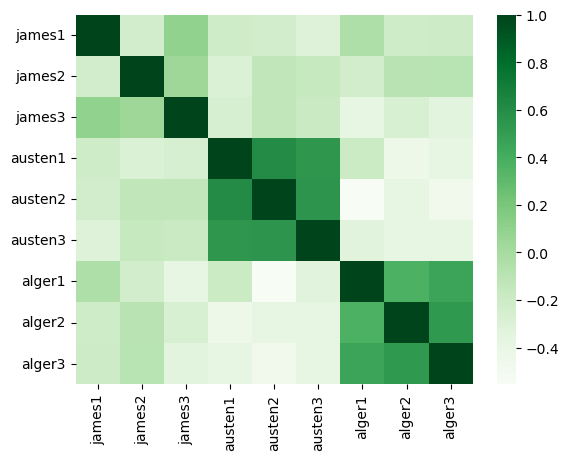

In [17]:
p1 = sns.heatmap(df, cmap="Greens", xticklabels=names, yticklabels=names)

Q4 **(check-plus)**: From the Grieve 2005, "[Quantiative Authorship Attribution: A History and Evaluation of Techniques](https://summit.sfu.ca/_flysystem/fedora/sfu_migrate/8840/etd1721.pdf)" paper referenced above, pick one other stylistic feature and implement it.  As with the other stylistic measures, run it on the 9 books above; does it differentiate those authors?

Q4 answer: \
Yes. I tried 2-gram (or bigram) method with the top 155 common 2-grams in the given 9 books. The heatmap plot seems to work just as well as the heatmap above. It is obvious to tell the books that belong to Austen and Alger, but not as obivious to tell the books of James.

In [18]:
from nltk import bigrams
from nltk.probability import FreqDist
from nltk import bigrams
import numpy as np

# list(bigrams(james[0]))

In [19]:
def find_top_keys(book):
    
    tokens = list(bigrams(book.lower()))
    
    freq_dict = FreqDist(tokens)
    bigram_freq = dict()
    
    sorted_items = sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)
    top_keys = [item[0] for item in sorted_items[:200]]
    
    return top_keys

In [20]:
common_2_grams = list(set(find_top_keys(james[0])) & set(find_top_keys(james[1])) & set(find_top_keys(james[2])) & 
                      set(find_top_keys(austen[0])) & set(find_top_keys(austen[1])) & set(find_top_keys(austen[2])) & 
                      set(find_top_keys(alger[0])) & set(find_top_keys(alger[1])) & set(find_top_keys(alger[2])))
print(len(common_2_grams), common_2_grams)

155 [('w', 'o'), ('e', 'd'), ('i', 'l'), ('i', 'c'), ('m', 'e'), ('o', 'f'), ('i', 'n'), ('c', 'a'), ('i', 'r'), ('h', 'a'), ('t', 'a'), ('i', ' '), (' ', 'h'), ('m', 'o'), ('e', 'v'), ('r', 'a'), ('p', 'e'), ('h', 'o'), ('e', ','), ('y', ' '), ('o', 'm'), ('r', 'o'), ('p', 'o'), ('s', 't'), (' ', 'g'), ('d', 'o'), ('l', 'a'), ('s', 'u'), ('n', 'd'), ('u', 't'), ('i', 'd'), ('a', 's'), ('a', 'y'), ('n', 'g'), (' ', 'i'), (' ', 'e'), ('o', 'w'), ('o', 't'), ('o', 'u'), ('n', 'c'), ('m', 'a'), (' ', 's'), ('u', 'l'), ('u', 'n'), ('s', 'i'), ('s', ' '), ('n', ' '), ('u', 'r'), ('c', 'h'), ('e', '\n'), ('f', ' '), ('t', 'h'), (' ', 'p'), ('o', 'n'), ('l', 'l'), ('p', 'a'), ('a', 'b'), ('o', 'r'), ('e', 'e'), ('\n', 't'), ('o', ' '), ('s', 'h'), ('l', ' '), ('e', 's'), ('w', 'i'), ('w', ' '), ('r', 't'), (' ', 'm'), ('k', 'e'), ('w', 'h'), ('c', 'e'), ('h', 'i'), ('t', 'i'), ('h', ' '), ('t', ' '), ('a', 't'), ('b', 'e'), ('e', 'n'), (' ', 'y'), ('r', 'i'), ('l', 'd'), ('r', ' '), ('p', 'r'

In [21]:
def count_2_gram_freqs(book):
    
    tokens = list(bigrams(book.lower()))
    book_len = len(tokens)
    
    freq_dict = FreqDist(tokens)
    bigram_freq = dict()
    
    for bigram in common_2_grams:
        bigram_freq[bigram] = freq_dict[bigram]/book_len
    
    return bigram_freq

In [22]:
for book in james:
    freqs=count_2_gram_freqs(book)
    print("James '('h', 'e')': %.5f" % freqs[('h', 'e')])

for book in austen:
    freqs=count_2_gram_freqs(book)
    print("Austen '('h', 'e')': %.5f" % freqs[('h', 'e')])

for book in alger:
    freqs=count_2_gram_freqs(book)
    print("Alger '('h', 'e')': %.5f" % freqs[('h', 'e')])

James '('h', 'e')': 0.02384
James '('h', 'e')': 0.02464
James '('h', 'e')': 0.02150
Austen '('h', 'e')': 0.01995
Austen '('h', 'e')': 0.02191
Austen '('h', 'e')': 0.02165
Alger '('h', 'e')': 0.01828
Alger '('h', 'e')': 0.01809
Alger '('h', 'e')': 0.01653


The functions you wrote now give you a way represent a text as a vector of stylistic features.  Let's see how we can use that to compare the similarity of styles between the three authors above.

In [23]:
def featurize_style(text):
    vec=[]
    vec.append(get_avg_sentence_length(text))
    vec.append(type_token_ratio(text))
    bigram_freq=count_2_gram_freqs(text)
    for bigram in common_2_grams:
        if bigram in bigram_freq:
            vec.append(bigram_freq[bigram])
        else:
            vec.append(0)
    return vec

In [24]:
all_vecs=[]
for book in james:
    all_vecs.append(featurize_style(book))

for book in austen:
    all_vecs.append(featurize_style(book))

for book in alger:
    all_vecs.append(featurize_style(book))


We're going to compare the style vector for each book with each other, comparing them via cosine similarity. To give equal weight to each style dimension, we'll normalize each feature to its z score (with respect to the value of that feature across all observations).

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_vecs)
all_vecs=scaler.transform(all_vecs)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
sims=cosine_similarity(all_vecs, all_vecs)

Now let's visualize those similarites as a heatmap.

In [28]:
import seaborn as sns
import pandas as pd

In [29]:
names=["james1", "james2", "james3", "austen1", "austen2", "austen3", "alger1", "alger2", "alger3"]
df = pd.DataFrame(sims, columns=names)

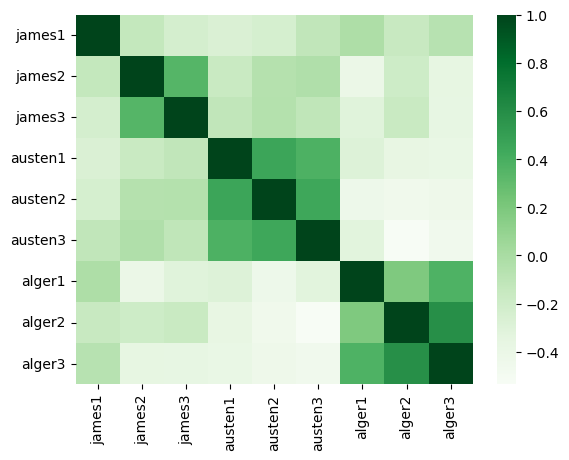

In [30]:
p1 = sns.heatmap(df, cmap="Greens", xticklabels=names, yticklabels=names)